# 1. 初始準備
### Keras 可以用各種不同的深度學習套件當底層，我們可以指定用 Tensorflow 以確保執行的一致性。

###  %env KERAS_BACKEND = tensorflow
###  
### 再來是我們標準數據分析動作

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 2. 讀入 MNIST 數據庫
### MNIST 是有一堆0-9的手寫數字圖庫。有6萬筆訓練資料，1萬筆測試資料。

In [2]:
from keras.datasets import mnist

C:\Users\Andygyr\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()  # x 是向量， y是答案

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
X = x_train[10] # 用陣列表示圖片，數字越大越黑
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
X.shape # 28*28 pixels

(28, 28)

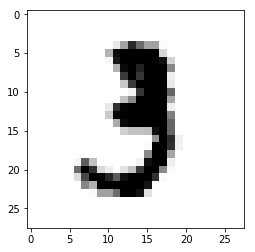

In [8]:
plt.imshow(X, cmap = 'Greys') # c = color, cmap = theme

In [9]:
y_train[10]

3

# 輸入格式整理
### 現在將要使用的標準神經網路(NN)不吃矩陣，因此要將數據reshape

In [10]:
x_train.shape # 60000筆資料，每筆28*28

(60000, 28, 28)

In [11]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

# 輸出格式整理
### 我們可能會想, 我們想學的函數是這樣的型式:

### $$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}$$
### 其實這樣不太好! 為什麼呢? 比如說我們的輸入 x 是一張 0 的圖, 因為我們訓練的神經網路總會有點誤差, 所以可能會得到:

### $$\hat{f}(x) = 0.5$$
### 那這意思是有可能是 0, 也有可能是 1 嗎!!?? 可是 0 和 1 根本不像啊。換句話說分類的問題這樣做其實不合理!

### 於是我們會做 "1-hot encoding", 也就是

### 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
### 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0]
### 等等。因為分類問題基本上都要做這件事, Keras 其實已幫我們準備好套件!

In [12]:
from keras.utils import np_utils

In [13]:
y_train = np_utils.to_categorical(y_train,10) #分成10類 (0~9)
y_test = np_utils.to_categorical(y_test,10)

In [14]:
y_train[10] # = 3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 建立神經網路
## 先開一個函數學習機。標準一層一層傳遞的神經網路叫做 Sequential , 於是打開一個空的神經網路。

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation #activation 激發方程式
from keras.optimizers import SGD # 隨機梯度下降法 Stochastic gradient descent
# 因為要反覆訓練，隨機的目的是打亂訓練順序，避免記憶答案

### 每次用add去加一層，從第一個隱藏層開始。而第一個隱藏層因為 Keras 不知道輸入有幾個 features，所以要告訴它。

In [16]:
model = Sequential() # 打開一個 Sequential 型的函數學習機

### 至此為止，先整理一下數據:
### input : 784 維
### output: 10 維
### 第一層 : 4個神經元
### 第二層 : 2個神經元

In [17]:
model.add(Dense(500, input_dim = 784))  
# 加一層 hidden layer，指定4個神經元，並告訴它輸入資料的維度
model.add(Activation('sigmoid'))

In [18]:
model.add(Dense(500)) 
# 接前面的資料，不用告訴它輸入幾維(前面4的神經元就是4維)
model.add(Activation('sigmoid'))

In [19]:
#model.add(Dense(2))

### 輸出有 10 個數字, 所以輸出層的神經元是 10 個! 而如果我們的網路輸出是

$$(y_1, y_2, \ldots, y_{10})$$
### 我們還希望

$$\sum_{i=1}^{10} y_i = 1$$
### 這可能嗎, 結果是很容易, 就用 softmax 當激發函數就可以!!

In [20]:
model.add(Dense(10)) # 輸出層 10維
model.add(Activation('softmax'))

## 至此神經網路建立完成
###  
# 組裝
## 與之前不同的是我們還要做 compile 才正式把神經網路建好
## 還需做以下步驟:
### 1. 決定 loss function，一般是 mse
### 2. 決定 optimizer ， 使用標準的SGD
### 3. 設定 learning rate
## 為了一邊訓練一邊看到結果，可以加設
## metrics = ['accuracy']


In [21]:
model.compile(loss = 'mse',optimizer=SGD(lr = 0.05), metrics=['accuracy'])

# 檢視一下神經網路的架構

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
784*4+4  # 784個輸入，4個 weight，4個 bias

3140

In [24]:
4*2+2

10

In [25]:
2*10+10

30

# 開始訓練神經網路
### 一次要訓練幾筆資料(batch_size)，我們100筆調一次參數好了
### 這6萬筆資料一共要訓練幾次(epochs)，訓練20次試試

In [28]:
model.fit(x_train, y_train, batch_size=100, epochs= 20)

Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0095 - acc: 0.9442
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0094 - acc: 0.9453
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0092 - acc: 0.9458
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0091 - acc: 0.9466
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0090 - acc: 0.9472
Epoch 6/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0089 - acc: 0.9477
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0088 - acc: 0.9482
Epoch 8/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0087 - acc: 0.9489
Epoch 9/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0086 - acc: 0.9494
Epoch 10/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0085 - acc: 0.949

# 試用結果

In [29]:
from ipywidgets import interact_manual

### predict放的是神經網路學習的結果，這裡的predict_class會讓Keras選10個輸出機率最大的那類。

In [30]:
predict = model.predict_classes(x_test)

In [31]:
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### 注意 x_test 已經變成784維的向量，需要將其還原成28*28的矩陣才能當圖形顯示出來

In [32]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap = 'Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 0


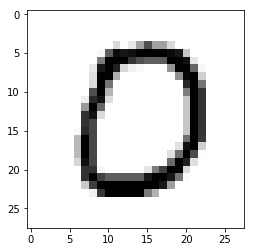

In [33]:
test(10)

In [34]:
interact_manual(test, 測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

## 測試資料的總狀況

In [35]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 104us/step


In [36]:
print('loss:', score[0]) # loss funtion 的平均誤差
print('accuracy', score[1])

loss: 0.01035383340048138
accuracy 0.932


# 將訓練好的神經網路存起來
### 若對訓練結果滿意，可以將該神經網路存起來以便日後使用
###  
### 之前還沒裝 pyh5 要在終端機 (Anaconda Prompt) 下安裝:
###  conda install h5py

In [37]:
# 存檔

model_json = model.to_json() # 存成json格式
open('My_first_DL.json','w').write(model_json)
model.save_weights('My_first_DL_weights.h5')

In [38]:
# 讀取檔案

# from keras.models import model_from_json
# from keras.optimizers import SGD

# model = model_from_json(open('My_first_DL').read())
# model.load_weights('My_first_DL_weights.h5')
# model.compile(loss = 'mse', optimizer=SGD(lr = 0.087))

# from keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# X = x_test[87]
# X.shape  --> 28*28
# X.reshape(1, 784)  --> 將 X[87] 這筆資料拉平

# model.predict_classes(X.reshape(1,784))
# plt.imshow(X, cmap = 'Greys')